
# 模板



In [5]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
#   https://tianchi.aliyun.com/competition/entrance/231784/information

In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1.导入数据
   - 训练数据 
   - 验证数据 
   - 预测数据 


In [ ]:
### 

In [2]:
# 
path='../tianchi/car'
train_data= pd.read_csv(path+'/used_car_train_20200313/used_car_train_20200313.csv',sep=' ',index_col=0)
test_data= pd.read_csv(path+'/used_car_testB_20200421/used_car_testB_20200421.csv',sep=' ',index_col=0)

predict_data= pd.read_csv(path+'/used_car_sample_submit.csv',sep=',')


In [3]:
train_data.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [4]:
test_data.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,2581.080680,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,1889.248559,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1006.000000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2204.500000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3842.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,8120.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [5]:
predict_data.tail()

,SaleID,price
49995,249995,6231.0
49996,249996,21605.0
49997,249997,5805.0
49998,249998,4945.0
49999,249999,4941.0


In [6]:
train_data.columns

Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller',
       'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 30 columns):
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5     

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 200000 to 249999
Data columns (total 29 columns):
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48496 non-null float64
fuelType             47076 non-null float64
gearbox              48032 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non-null float64
v_6                  5

In [9]:
y_train_data = train_data['price']
train_data.pop('price')
y_train_data.shape

(150000,)

#### 合并 训练集和验证集

In [10]:
all_data = pd.concat((train_data,test_data),axis=0)

In [11]:
all_data.shape

(200000, 29)

## 2.特征工程

In [240]:
all_data.columns

Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller',
       'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5',
       'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'used_time'],
      dtype='object')


#### 2.1把category的变量转变成numerical表达形式
当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。

pandas自带的get_dummies方法，可以帮你一键做到One-Hot。
#### 处理类型处理 one-hot encoding


In [239]:
pd.get_dummies(all_data['brand'], prefix='brand').head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,...,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39
SaleID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
# 对类别特征进行 OneEncoder
all_data = pd.get_dummies(all_data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage'])
all_data.head()

,name,regDate,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,...,fuelType_0.3760058599970275,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_0.0,gearbox_0.22544532441903453,gearbox_1.0
SaleID,,,,,,,,,,,,,,,,,,,,,
0,736,20040402,60,12.5,1046,0,0,20160404,43.357796,3.966344,...,0,0,0,0,0,0,0,1,0,0
1,2262,20030301,0,15.0,4366,0,0,20160309,45.305273,5.236112,...,0,0,0,0,0,0,0,1,0,0
2,14874,20040403,163,12.5,2806,0,0,20160402,45.978359,4.823792,...,0,0,0,0,0,0,0,1,0,0
3,71865,19960908,193,15.0,434,0,0,20160312,45.687478,4.492574,...,0,0,0,0,0,0,0,0,0,1
4,111080,20120103,68,5.0,6977,0,0,20160313,44.383511,2.031433,...,0,0,0,0,0,0,0,1,0,0


In [247]:
all_data.columns

Index(['name', 'regDate', 'power', 'kilometer', 'regionCode', 'seller',
       'offerType', 'creatDate', 'v_0', 'v_1',
       ...
       'fuelType_0.3760058599970275', 'fuelType_1.0', 'fuelType_2.0',
       'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0', 'fuelType_6.0',
       'gearbox_0.0', 'gearbox_0.22544532441903453', 'gearbox_1.0'],
      dtype='object', length=336)

#### 2.2处理日期数据


In [233]:
all_data['creatDate'].head()

SaleID
0    20160404
1    20160309
2    20160402
3    20160312
4    20160313
Name: creatDate, dtype: int64

In [234]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
all_data['used_time'] = (pd.to_datetime(all_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(all_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
# 看一下空数据，有 15k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
all_data['used_time'].isnull().sum()

15083

In [235]:
all_data['used_time'].head()

SaleID
0    4385.0
1    4757.0
2    4382.0
3    7125.0
4    1531.0
Name: used_time, dtype: float64

#### 获取日期的星期 周 月 日，旬

In [32]:
#
all_data['regDate'].dtype
pd.to_datetime(all_data['regDate'],format='%Y%M%d')
all_data['regDate'][0]


20040402

In [34]:
all_data['regDateParsed'] = pd.to_datetime(all_data['regDate'],format='%Y%M%d')


In [49]:
# all_data['regDate_dayofweek'] = 

#help(all_data['regDateParsed'].dt)
all_data['regDateParsed'].dt.year
all_data['regDateParsed'].dt.month
all_data['regDateParsed'].dt.day
## 一年的第几周
all_data['regDateParsed'].dt.weekofyear
## 一月中第几天
all_data['regDateParsed'].dt.daysinmonth


## 设置是否是节假日
## 一周星期几 0 星期一   Monday=0, Sunday=6
all_data['regDateParsed'].dt.dayofweek
## 是否是周末
all_data['regDateParsed'].dt.dayofweek[all_data['regDateParsed'].dt.dayofweek ==5]

## 上中下旬



## 第几个季度
#all_data['regDateParsed'].dt

#help(all_data['regDateParsed'].dt)

SaleID
0         31
1         31
2         31
3         31
4         31
5         31
6         31
7         31
8         31
9         31
10        31
11        31
12        31
13        31
14        31
15        31
16        31
17        31
18        31
19        31
20        31
21        31
22        31
23        31
24        31
25        31
26        31
27        31
28        31
29        31
          ..
249970    31
249971    31
249972    31
249973    31
249974    31
249975    31
249976    31
249977    31
249978    31
249979    31
249980    31
249981    31
249982    31
249983    31
249984    31
249985    31
249986    31
249987    31
249988    31
249989    31
249990    31
249991    31
249992    31
249993    31
249994    31
249995    31
249996    31
249997    31
249998    31
249999    31
Name: regDateParsed, Length: 200000, dtype: int64

#### 2.3处理空值  一般处理过程  空值处理填平均值，

In [248]:
all_data.isnull().sum().sort_values(ascending=False).head(10)

gearbox_1.0    0
model_86.0     0
model_78.0     0
model_79.0     0
model_80.0     0
model_81.0     0
model_82.0     0
model_83.0     0
model_84.0     0
model_85.0     0
dtype: int64

##### 填了平均值

In [236]:
mean_cols = all_data.mean()
mean_cols.head(10)
all_data = all_data.fillna(mean_cols)


In [237]:
all_data.isnull().sum().sort_values(ascending=False).head(10)

used_time    0
v_14         0
regDate      0
model        0
brand        0
bodyType     0
fuelType     0
gearbox      0
power        0
kilometer    0
dtype: int64

##### 标准化numerical数据
一般来说，regression的分类器都比较傲娇，最好是把源数据给放在一个标准分布内。不要让数据间的差距太大。

计算标准分布：(X-X')/s

让我们的数据点更平滑，更便于计算。

注意：我们这里也是可以继续使用Log的，我只是给大家展示一下多种“使数据平滑”的办法。

In [185]:
#numeric_cols = all_data.columns[all_data.dtypes != 'object']
#numeric_col_means = all_data.loc[:, numeric_cols].mean()
#numeric_col_std = all_data.loc[:, numeric_cols].std()

#all_data.loc[:, numeric_cols] = (all_data.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

#all_data.loc[:, numeric_cols] = np.log1p(all_data.loc[:, numeric_cols])



#### 统一进行log处理变成正态分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A780DE3780>,
      dtype=object)

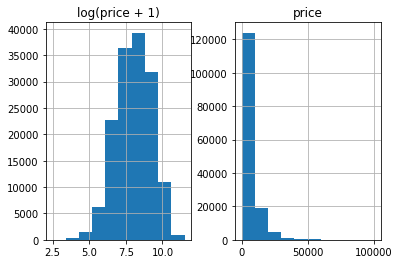

In [284]:
%matplotlib inline
prices = pd.DataFrame({"price":y_train_data, "log(price + 1)":np.log1p(y_train_data)})
prices.hist()

#### 处理文本数据

In [249]:
numerical_cols = all_data.select_dtypes(exclude = 'object').columns

In [250]:
numerical_cols

Index(['name', 'regDate', 'power', 'kilometer', 'regionCode', 'seller',
       'offerType', 'creatDate', 'v_0', 'v_1',
       ...
       'fuelType_0.3760058599970275', 'fuelType_1.0', 'fuelType_2.0',
       'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0', 'fuelType_6.0',
       'gearbox_0.0', 'gearbox_0.22544532441903453', 'gearbox_1.0'],
      dtype='object', length=336)

In [251]:
feature_columns = [ 'name', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode',
       'seller', 'offerType', 'used_time']
feature_data = all_data[numerical_cols]

#### 拆分训练数据和预测数据

In [252]:
X_train_data = feature_data.loc[train_data.index]
X_test_data = feature_data.loc[test_data.index]

In [289]:
X_train_data.columns

Index(['name', 'regDate', 'power', 'kilometer', 'regionCode', 'seller',
       'offerType', 'creatDate', 'v_0', 'v_1',
       ...
       'fuelType_0.3760058599970275', 'fuelType_1.0', 'fuelType_2.0',
       'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0', 'fuelType_6.0',
       'gearbox_0.0', 'gearbox_0.22544532441903453', 'gearbox_1.0'],
      dtype='object', length=336)

#### 保存处理后的数据


In [190]:
pd.DataFrame(y_train_data).to_csv(path+'/temp_y_train_data.csv')
pd.DataFrame(all_data).to_csv(path+'/temp_all_data.csv')
#my_submission.to_csv('submission.csv',index = False,header = False,columns = ['date','cnt'])
#my_submission.to_csv('result.txt',index=False,header=False,columns = ['date','cnt'],sep='\t')

In [317]:
X_train_model = X_train_data
X_test = X_test_data

y_train_model = np.log1p(y_train_data)
#y_train = y_train_data


In [318]:
X_train_model.shape,y_train_model.shape

((150000, 336), (150000,))

## 3.定义模型

In [319]:

from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score


### 获取最有参数
   - 网格查找
   - 自定义遍历
   - 例下 alphas 要获取一个最优的参数

##### Ridge

In [320]:
from sklearn.linear_model import Ridge


In [321]:
np.logspace(-3,2,50)

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [323]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    #test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #test_scores.append(np.mean(test_score))
    test_score = cross_val_score(clf,X_train_model,y=y_train_model)
    test_scores.append(np.mean(test_score))

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline

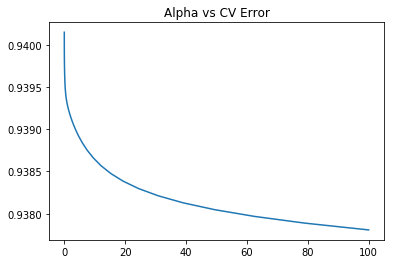

In [325]:

plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

#####  RandomForestRegressor


In [326]:
from sklearn.ensemble import RandomForestRegressor

In [328]:

max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    #test_score = np.sqrt(-cross_val_score(clf, X_train_model, y_train_model, cv=5, scoring='neg_mean_squared_error'))
    #test_scores.append(np.mean(test_scores))
    test_score = cross_val_score(clf,X_train_model,y=y_train_model)
    test_scores.append(np.mean(test_score))


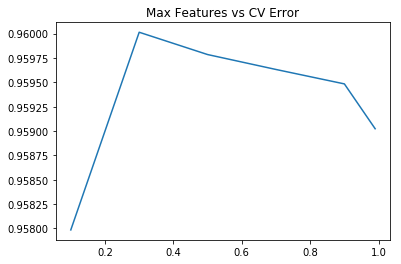

In [329]:

plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

#### 获取到最佳参数alpha = 100 max_features=0.3,然后定义模型

In [107]:
ridge = Ridge(alpha=100)
rf = RandomForestRegressor(n_estimators=20, max_features=0.3)

#### 做一点高级的Ensemble
一般来说，单个分类器的效果真的是很有限。我们会倾向于把N多的分类器合在一起，做一个“综合分类器”以达到最好的效果。

我们从刚刚的试验中得知，Ridge(alpha=15)给了我们最好的结果

模型融合


In [ ]:
from sklearn.ensemble import BaggingRegressor

In [330]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    #test_score = np.sqrt(-cross_val_score(clf, X_train_model, y_train_model, cv=10, scoring='neg_mean_squared_error'))
    #test_scores.append(np.mean(test_score))
    test_score = cross_val_score(clf,X_train_model,y=y_train_model)
    test_scores.append(np.mean(test_score))


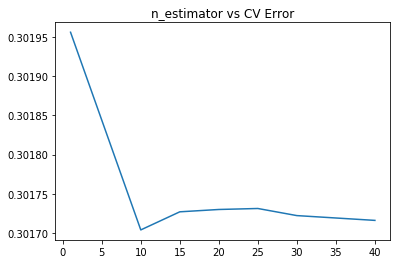

In [331]:

plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [311]:
t_model = DecisionTreeRegressor(max_leaf_nodes = 1000,random_state = 0)

In [338]:
bgr_model = BaggingRegressor(n_estimators=10, base_estimator=ridge)

In [ ]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=t_model)
    #test_score = np.sqrt(-cross_val_score(clf, X_train_model, y_train_model, cv=10, scoring='neg_mean_squared_error'))
    #test_scores.append(np.mean(test_score))
    test_score = cross_val_score(clf,X_train_model,y=y_train_model)
    test_scores.append(np.mean(test_score))


In [ ]:

plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

## 4.训练模型

In [335]:

ridge.fit(X_train_model, y_train_model)
rf.fit(X_train_model, y_train_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [336]:
t_model.fit(X_train_model,y_train_model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=1000, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [339]:
bgr_model.fit(X_train_model,y_train_model)

BaggingRegressor(base_estimator=Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

## 5.验证模型
   -  （留出法）把测试数据分为两部分，一部分做训练，另一部分做测试
   -  （交叉验证）评估结果
   -  自助采样，有放回的抽取 1/e  36.8% 可能不出现
   

### 评估指标
   - 分类问题：错误率和精度  二分类： 准确率和召回率，预测的正例中，我找到正的； 真实为正的我找到了多少。AUC
   - 回归问题：平均误差，均方误差，方根误差，R平方 ，MAE  MSE  RMSE  R平方
   
   

####  留出法 拆分测试数据作为验证数据

In [265]:
## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [299]:
## Split data with val
X_train,X_val,y_train,y_val = train_test_split(X_train_data,np.log1p(y_train_data),test_size=0.3)

In [305]:
t_model = DecisionTreeRegressor(max_leaf_nodes = 400,random_state = 0)
t_model.fit(X_train,y_train)


# validation
predicted_num = t_model.predict(X_val)
#predicted_num = np.expm1(t_model.predict(X_val))

print (mean_absolute_error(y_val,predicted_num))


0.2114082734161959


In [332]:
test_scores=[]
params = [300,350,400,450,500,550,600,650,700,750,1000]
def getmea(max_leaf_nodes,mea_train_x,mea_test_x,mea_train_y,mea_test_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,random_state = 0)
    model.fit(mea_train_x,mea_train_y)
    predicted_test = model.predict(mea_test_x)
    return mean_absolute_error(mea_test_y,predicted_test)

for max_leaf_nodes in params:
    mea = getmea(max_leaf_nodes,X_train,X_val,y_train,y_val)
    test_scores.append(mea)
    #print("Max_leaf_nodes: %d ,mea: %f" %(max_leaf_nodes,mea))


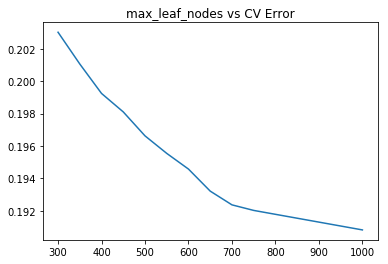

In [333]:

plt.plot(params, test_scores)
plt.title("max_leaf_nodes vs CV Error");

#### 10折交叉验证

In [279]:

## 5折交叉验证方式
sk=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

scores_train = []
scores = []
for train_ind,val_ind in sk.split(X_train_data,y_train_data):
    
    train_x=X_train_data.iloc[train_ind].values
    train_y=y_train_data.iloc[train_ind]
    val_x=X_train_data.iloc[val_ind].values
    val_y=y_train_data.iloc[val_ind]
    
    ##ridge.fit(train_x,train_y)

    #pred_train_ridge=ridge.predict(train_x)
    #pred_ridge=ridge.predict(val_x)
    
    pred_train_ridge=  np.expm1(ridge.predict(train_x))
    pred_ridge = np.expm1(ridge.predict(val_x))
    
    score_train = mean_absolute_error(train_y,pred_train_ridge)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_ridge)
    scores.append(score)


In [280]:

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 948.8578816807598
Val mae 934.2433814587573


## 6.预测结果

In [340]:
#y_ridge =ridge.predict(X_test)
#y_rf = rf.predict(X_test)

y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))
y_t = np.expm1(t_model.predict(X_test))

y_bgr = np.expm1(bgr_model.predict(X_test))

y_final = ( y_ridge + y_rf + y_t + y_bgr ) / 4



## 7. 保存预测结果和模型

In [345]:

int_cnt = np.around(y_t)
#y_final

In [346]:
result = pd.DataFrame({'SaleID':X_test.index,'price':int_cnt})
result.to_csv(path+'/used_car_sample_submit.csv',index = False,header = True,columns = ['SaleID','price'])

#result.to_csv('result.txt',index=False,header=False,columns = ['date','cnt'],sep='\t')


In [ ]:
from sklearn.externals import joblib

In [ ]:
#save model
joblib.dump(ridge,'ridge.model')
#load model
model = joblib.load('ridge.model')